# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [11]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data<

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=43)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [13]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 31367
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

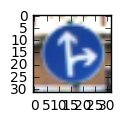

In [17]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)
#print(y_train[index])
#print(image)

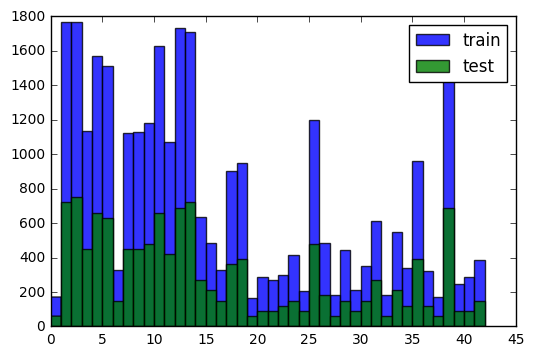

In [18]:
### Unbalanced dataset
import matplotlib.pyplot as plt
plt.hist(y_train, list(range(0, n_classes)), alpha=0.8, label='train')
plt.hist(y_test, list(range(0, n_classes)), alpha=0.8, label='test')
plt.legend(loc='upper right')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

**Question 1
Describe the techniques used to preprocess the data.
Answer:

**Answer:

For data preprocessing, I experimented with normalization (from 0-255 to 0-1) and conversion from RGB to YUV.
I didn't use Color to Grayscale transformation mainly because the color of a sign is an important feature that can change completely the meaning of a sign. 

After training the network, the training accuracy for the above techniques showed: 
    
    - RGB / no normalization   : 94.36%
    - RGB / with normalization : 93.74%
    - YUB / no normalization   : 94.01%
    - YUB / with normalization : 94.48%
        
From the above numbers, we can see that the effect of preprocessing improved slightly the training accuracy of the network.


In [2]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

import cv2

def rgb2yuv(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    return img

# Normalizes the data between 0 and 1 instead of 0 to 255    
def normalize(data):
    return data / 255.0

# Iterates through grayscale for each image in the data
def preprocess(data):
    images = []
    for image in data:
        gray = rgb2yuv(image)
        gray = normalize(image)
        images.append(image)
        
    return np.array(images)


In [20]:
import cv2
def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img

In [21]:
X_train = preprocess(X_train)
X_test = preprocess(X_test)
X_validation = preprocess(X_validation)


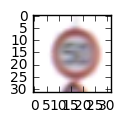

In [22]:
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)


In [23]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [ ]:
from scipy import ndimage

initial_size = len(X_train)
#print(initial_size)

hist, bin_edges = np.histogram(y_train, bins=list(range(0, n_classes+1)))
max_class = max(hist)

#print(y_train.shape)
for i in bin_edges:
    if i == 43:
        continue
    print("Balancing class: "+str(i))
    if (hist[i]>max_class/3):
        continue
    else:
        inverseIndex = np.where(y_train == i)
        added = 0
        for k in inverseIndex[0]:
            #print(added+hist[i])
            if (added + hist[i] > max_class/3):
                break
            for j in range(5):
                added = added + 1
                initial_img = X_train[k]
                img = transform_image(initial_img,20,10,5)
                #ang_rot = np.random.uniform(50)-25
                #ndimage.rotate(initial_img, np.random.uniform(ang_rot), reshape=False)

                X_train = np.append(X_train, [img], axis=0)

                plt.imshow(img)
                y_train = np.append(y_train, [y_train[k]], axis=0)

print("Done!")                                                
initial_size = len(X_train)
#print(initial_size)

Balancing class: 0
Balancing class: 1
Balancing class: 2
Balancing class: 3
Balancing class: 4
Balancing class: 5
Balancing class: 6
Balancing class: 7
Balancing class: 8
Balancing class: 9
Balancing class: 10
Balancing class: 11
Balancing class: 12
Balancing class: 13
Balancing class: 14
Balancing class: 15
Balancing class: 16
Balancing class: 17
Balancing class: 18
Balancing class: 19
Balancing class: 20
Balancing class: 21


In [ ]:
### More balanced dataset
import matplotlib.pyplot as plt
plt.hist(y_train, list(range(0, n_classes)))
plt.hist(y_test, list(range(0, n_classes)))
plt.show()

In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**


Since the input dataset is not balanced, I created more images for balancing the dataset by rotation and translation of the existing images. After training with and without the additional images, the results are shown below:

    - unbalanced dataset : 94.48%
    - balanced dataset   : 94.18%


In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [6]:
from tensorflow.contrib.layers import flatten
import tensorflow as tf
tf.reset_default_graph()

EPOCHS = 80
BATCH_SIZE = 200

def LeNet(x):    
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.get_variable("conv1_W", shape=[5, 5, 3, 6], initializer=tf.contrib.layers.xavier_initializer())
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.get_variable("conv2_W", shape=[5, 5, 6, 16], initializer=tf.contrib.layers.xavier_initializer())
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 240.
    fc1_W = tf.get_variable("fc1_W", shape=[400, 240], initializer=tf.contrib.layers.xavier_initializer())
    fc1_b = tf.Variable(tf.zeros(240))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)
  

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.get_variable("fc2_W", shape=[240, 120], initializer=tf.contrib.layers.xavier_initializer())
    #fc2_W  = tf.Variable(tf.truncated_normal(shape=(240, 184), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(120))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
  

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W = tf.get_variable("fc3_W", shape=[120, 43], initializer=tf.contrib.layers.xavier_initializer())
    #fc3_W  = tf.Variable(tf.truncated_normal(shape=(184, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [15]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [16]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My final architecture is a convolutional neural network (CNN) similar to the Lenet network with a few changes.
I used two convolution layers with inputs 32x32x3 and 14x14x6. 
After each convolution layer, I used a relu and an average pooling layer. 
After flattening the output, we use a standard neural network layers with relus and dropout layers. 


In [14]:
### Train your model here.
### Feel free to use as many code cells as needed.

Training...

EPOCH 1 ... Validation Accuracy = 0.579
EPOCH 2 ... Validation Accuracy = 0.777
EPOCH 3 ... Validation Accuracy = 0.852
EPOCH 4 ... Validation Accuracy = 0.899
EPOCH 5 ... Validation Accuracy = 0.912
EPOCH 6 ... Validation Accuracy = 0.933
EPOCH 7 ... Validation Accuracy = 0.949
EPOCH 8 ... Validation Accuracy = 0.954
EPOCH 9 ... Validation Accuracy = 0.958
EPOCH 10 ... Validation Accuracy = 0.965
EPOCH 11 ... Validation Accuracy = 0.965
EPOCH 12 ... Validation Accuracy = 0.964
EPOCH 13 ... Validation Accuracy = 0.966
EPOCH 14 ... Validation Accuracy = 0.970
EPOCH 15 ... Validation Accuracy = 0.970
EPOCH 16 ... Validation Accuracy = 0.975
EPOCH 17 ... Validation Accuracy = 0.976
EPOCH 18 ... Validation Accuracy = 0.975
EPOCH 19 ... Validation Accuracy = 0.979
EPOCH 20 ... Validation Accuracy = 0.978
EPOCH 21 ... Validation Accuracy = 0.981
EPOCH 22 ... Validation Accuracy = 0.981
EPOCH 23 ... Validation Accuracy = 0.981
EPOCH 24 ... Validation Accuracy = 0.986
EPOCH 25 ...

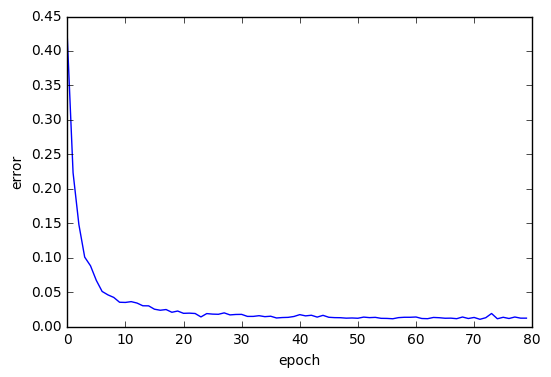

Model saved


In [20]:

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    validation_accuracy_array = []
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.6})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        validation_accuracy_array.append(1 - validation_accuracy)
        
        print("EPOCH {} ...".format(i+1)+" Validation Accuracy = {:.3f}".format(validation_accuracy))
        
        
    plt.plot(validation_accuracy_array)
    plt.xlabel('epoch')
    plt.ylabel('error')
    plt.show()
    
    saver.save(sess, './lenet.traffic.signs')
    print("Model saved")

In [15]:
# Launch the model on the test data
with tf.Session() as sess:
    saver.restore(sess, './lenet.traffic.signs')

    test_accuracy = sess.run(accuracy_operation, feed_dict={x: X_test, y: y_test, keep_prob : 1.0})

print('Test Accuracy: {}'.format(test_accuracy))

Test Accuracy: 0.9418057203292847


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

In [ ]:
Batch size: 300
Epochs: 80
Optimizer: AdamOptimizer since it has a few advantages compared to the GradientDescentOptimizer
Initializer: xavier_initializer since it doesnt need any parameter tuning 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I started with a standard CNN network (Lenet) that has proven its ability to classify correctly images.
Before running the network I made a few modifications: 
    - Xavier initializer to avoid parameter tuning on the weight initialization
    - Added dropout layers to avoid overfitting 

After a few trainings for adapting the Epoch number and batch size, I ended up with a quite good training accuracy (>92%).
To improve further, I added preprocessing steps and a method to balance the dataset.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

**Answer:**

[39, 17, 38, 1, 14, 9, 25, 30, 31]


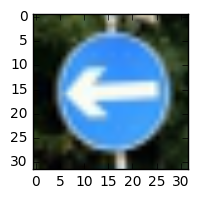

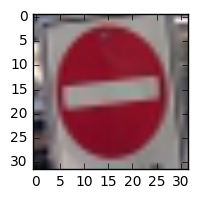

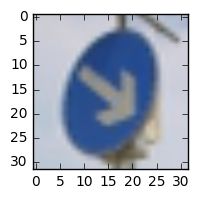

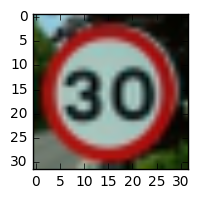

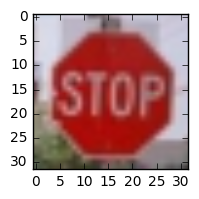

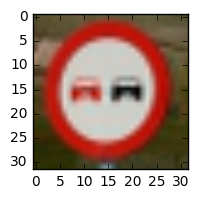

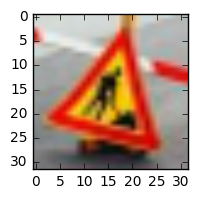

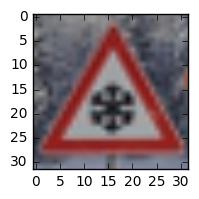

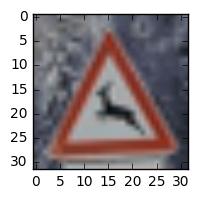

In [54]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

images = []
labels = [39, 17, 38, 1, 14, 9, 25, 30, 31]
from skimage import io
for i in range(2,11):
    image = Image.open('./test_images/test_image_{}.jpg'.format(str(i)))
    plt.figure(figsize=(2,2))
    
    image = image.convert('RGB')
    image = image.resize((32, 32), Image.ANTIALIAS)
    image = np.array(list(image.getdata()), dtype='uint8')
    image = np.reshape(image, (32, 32, 3))
    #plt.imshow(X_train[i+14])
    
    #images.append(X_train[i+14])
    images.append(image)
    #labels.append(y_train[i+14])
    
    inverseIndex = np.where(y_train == labels[i-2])
#    plot_image = np.concatenate((image, X_train[inverseIndex[0][1]]),axis=1) 
    plt.imshow(image)
    
print(labels)
images = preprocess(images)
images = np.array(images, dtype='uint8')



[39, 17, 38, 1, 14, 9, 25, 30, 31]
Left is the image from internet / Right are images from training set


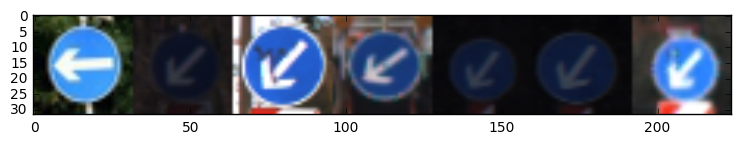

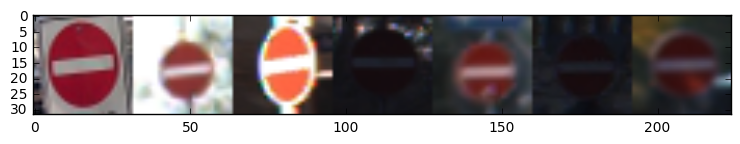

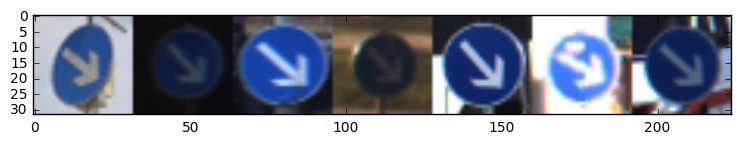

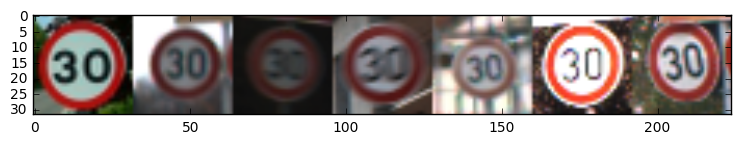

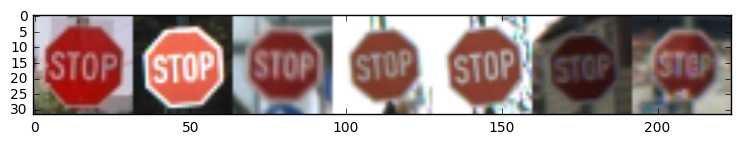

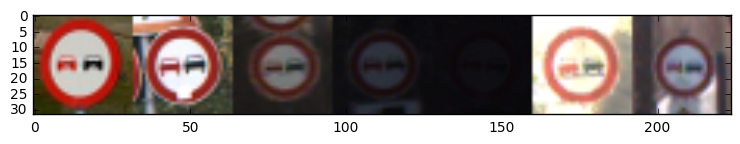

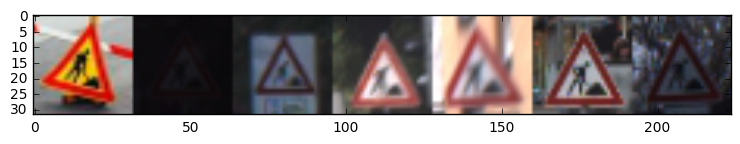

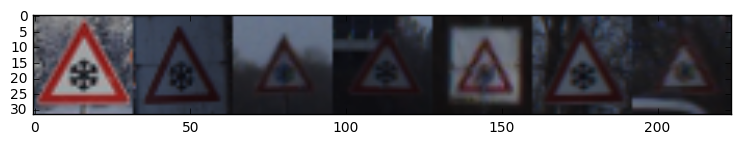

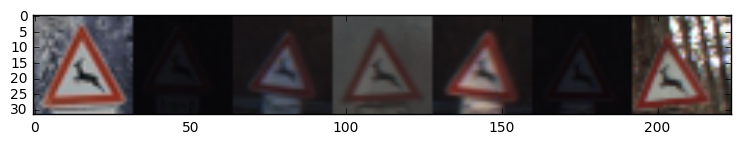

In [64]:
#print training samples for each label
print(labels)
print("Left is the image from internet / Right are images from training set")
i = 0
for image in images:
    plt.figure(figsize=(9,9))
    
    inverseIndex = np.where(y_train == labels[i])
    plot_image = np.concatenate((image, X_train[inverseIndex[0][1]]),axis=1) 
    plot_image_2 = np.concatenate((plot_image, X_train[inverseIndex[0][2]]),axis=1)
    plot_image_3 = np.concatenate((plot_image_2, X_train[inverseIndex[0][3]]),axis=1)
    plot_image_4 = np.concatenate((plot_image_3, X_train[inverseIndex[0][4]]),axis=1)
    plot_image_5 = np.concatenate((plot_image_4, X_train[inverseIndex[0][5]]),axis=1)
    plot_image_6 = np.concatenate((plot_image_5, X_train[inverseIndex[0][6]]),axis=1)
    plt.imshow(plot_image_6)
    i = i + 1

In [17]:

### Run the predictions here.
### Feel free to use as many code cells as needed.
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, './lenet.traffic.signs')
    print('Model restored with latest weights')
    
    prediction = sess.run(logits, feed_dict={x: images, y: labels, keep_prob : 1.0})
    

Model restored with latest weights


In [36]:
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, './lenet.traffic.signs')
    print('Model restored with latest weights')
    
    correct_pred = sess.run(correct_prediction, feed_dict={x: images, y: labels, keep_prob : 1.0})
    
    print(correct_pred)
    print("Accuracy:")
    print (np.count_nonzero(correct_pred == True) / len(correct_pred))
            

Model restored with latest weights
[False  True  True False  True  True False False  True]
Accuracy:
0.5555555555555556


In [19]:
class_description = ['Speed limit (20km/h)',
'Speed limit (30km/h)',
'Speed limit (50km/h)',
'Speed limit (60km/h)',
'Speed limit (70km/h)',
'Speed limit (80km/h)',
'End of speed limit (80km/h)',
'Speed limit (100km/h)',
'Speed limit (120km/h)',
'No passing',
'No passing for vechiles over 3.5 metric tons',
'Right-of-way at the next intersection',
'Priority road',
'Yield',
'Stop',
'No vechiles',
'Vechiles over 3.5 metric tons prohibited',
'No entry',
'General caution',
'Dangerous curve to the left',
'Dangerous curve to the right',
'Double curve',
'Bumpy road',
'Slippery road',
'Road narrows on the right',
'Road work',
'Traffic signals',
'Pedestrians',
'Children crossing',
'Bicycles crossing',
'Beware of ice/snow',
'Wild animals crossing',
'End of all speed and passing limits',
'Turn right ahead',
'Turn left ahead',
'Ahead only',
'Go straight or right',
'Go straight or left',
'Keep right',
'Keep left',
'Roundabout mandatory',
'End of no passing',
'End of no passing by vechiles over 3.5 metric tons']

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

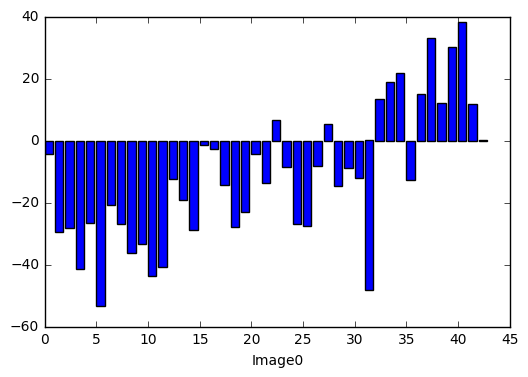

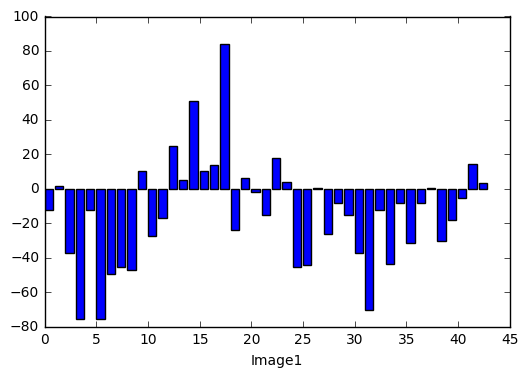

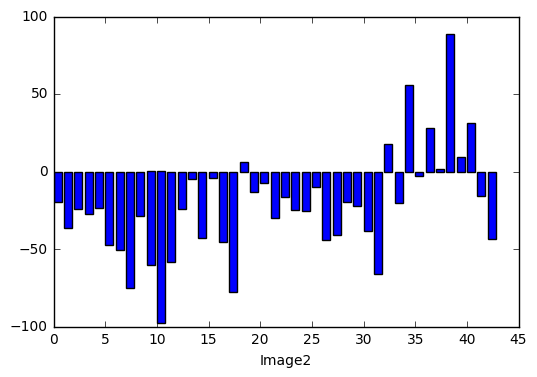

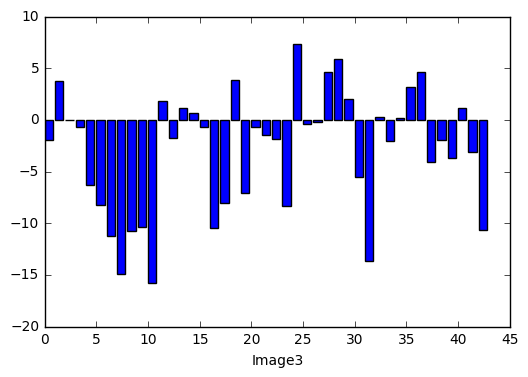

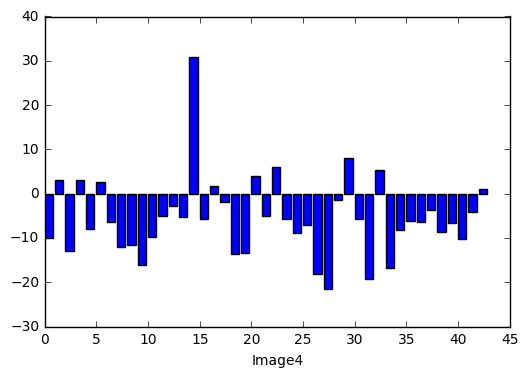

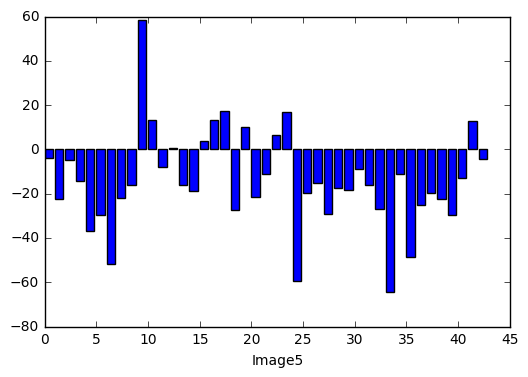

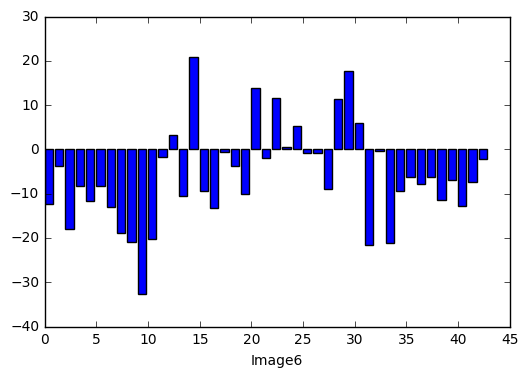

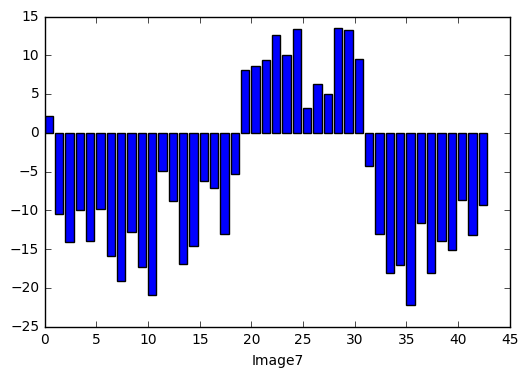

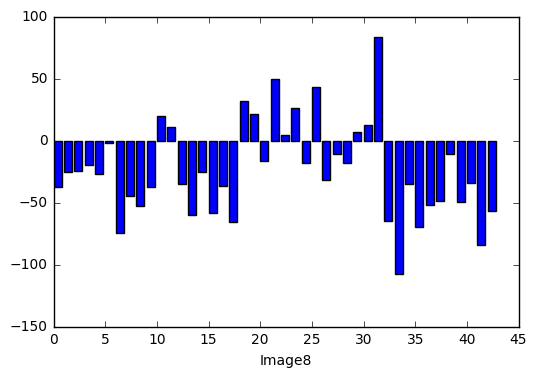

In [20]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

#print(len(prediction))
for i in range(0, len(prediction)):
    plt.bar(list(range(0, n_classes)), prediction[i])
    plt.xlabel('Image'+str(i))
    plt.show()

**Correctly classified**


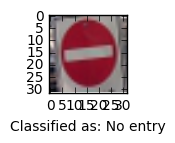

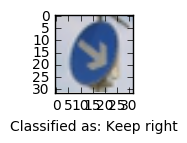

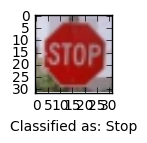

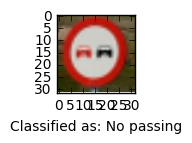

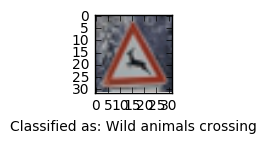

In [23]:
print('**Correctly classified**')
for i in range(2,11):
    if correct_pred[i - 2] == True:
        plt.figure(figsize=(1,1))
        plt.imshow(images[i - 2])
        plt.xlabel('Classified as: '+ str(class_description[np.argmax(prediction[i - 2])]))

**Wrongly classified**


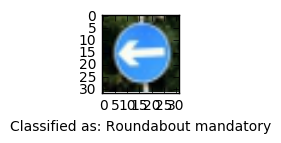

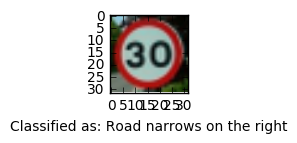

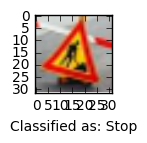

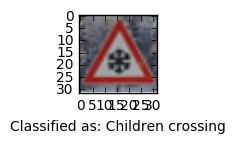

In [24]:
print('**Wrongly classified**')
for i in range(2,11):
    if correct_pred[i - 2] == False:
        plt.figure(figsize=(1,1))
        plt.imshow(images[i - 2])
        plt.xlabel('Classified as: '+ str(class_description[np.argmax(prediction[i - 2])]))

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

**Top 3 classes**


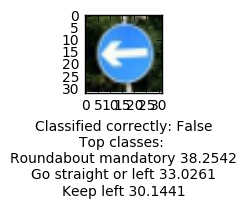

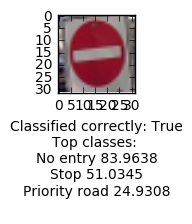

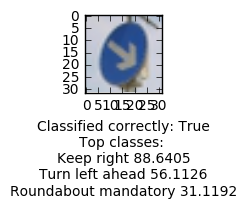

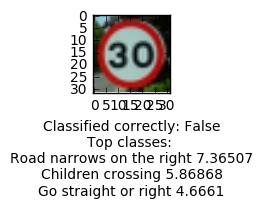

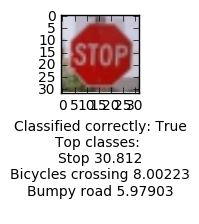

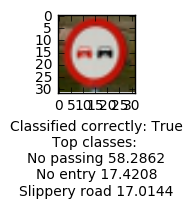

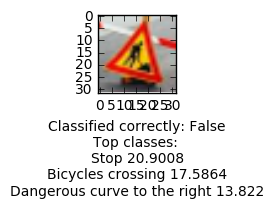

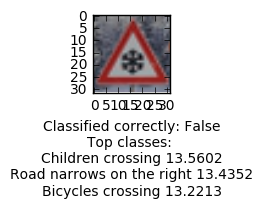

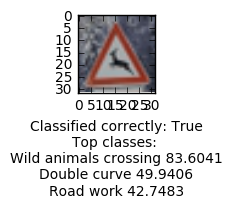

In [31]:
print('**Top 3 classes**')
for i in range(2,11):
    best3 = prediction[i-2].argsort()[-3:][::-1]
    plt.figure(figsize=(1,1))
    plt.imshow(images[i - 2])
    xlabel = 'Classified correctly: ' + str(correct_pred[i - 2])+'\n'
    xlabel = xlabel + 'Top classes: '+'\n' + str(class_description[best3[0]])+' '+str(prediction[i-2][best3[0]])+'\n'
    xlabel = xlabel + str(class_description[best3[1]])+' '+str(prediction[i-2][best3[1]])+'\n'
    xlabel = xlabel + str(class_description[best3[2]])+' '+str(prediction[i-2][best3[2]])+'\n'
    plt.xlabel(xlabel)


From the prediction I did to the candidate image, the testing accuracy is 55.55%, however, the model prediction accuracy on the training set was 94.18%. 

The first image is expected to be mis-classified since the arrow points to the left and in the training set is pointing left/bottom

The fourth image (30 sign) is misclassified maybe because the background is a bit more complex than in the training set however I would expect to be correctly classified.

The image 7 (roadwork) is on yellow background and on the training set is on white. Also it has a rotation that might be responsible for the misclassification

The image 8 (snow) maybe has a more complex background that on the training set but still it seems not that different from the training set.


We can clearly see that in the case of a correct classification the distance between the first and the second class is quite big (>10). In the case of wrong classification, the first and the second class are quite close. This certainty indication is something that we could use in order to identify wrong classifications.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.